In [0]:
# see https://youtu.be/iMIWee_PXl8

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# data = [[ [(j+i)] for i in range(5)] for j in range(100) ]
data = [[ [(j+i)/100] for i in range(5)] for j in range(100) ]

In [59]:
data[:10]

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]],
 [[0.05], [0.06], [0.07], [0.08], [0.09]],
 [[0.06], [0.07], [0.08], [0.09], [0.1]],
 [[0.07], [0.08], [0.09], [0.1], [0.11]],
 [[0.08], [0.09], [0.1], [0.11], [0.12]],
 [[0.09], [0.1], [0.11], [0.12], [0.13]]]

In [0]:
target = [ (i+5)/100 for i in range(100) ]

In [61]:
target[:10]

[0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14]

In [0]:
# test for variable sequence length
# data = [[ [(j+i)/100] for i in range(5)] for j in range(100) ]
# target = [ (i++5)/100 for i in range(100) ]

data = [[ [(j+i)/100] for i in range(6)] for j in range(100) ]
target = [ (i+6)/100 for i in range(100) ]

In [0]:
data = np.array(data,dtype=float)
target = np.array(target,dtype=float)

In [96]:
data.shape

(100, 6, 1)

In [97]:
target.shape

(100,)

In [0]:
x_train , x_test , y_train, y_test = train_test_split( data, target, test_size = 0.2, random_state=4)

In [0]:
model = Sequential()

In [0]:
# model.add( LSTM((1), batch_input_shape = (None,5,1), return_sequences=True) )
model.add( LSTM((1), batch_input_shape = (None,None,1), return_sequences=True) )
model.add( LSTM((1), return_sequences=False ) )

In [0]:
model.compile(loss="mean_absolute_error", optimizer = "adam", metrics = ['accuracy'])

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, None, 1)           12        
_________________________________________________________________
lstm_8 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [99]:
history = model.fit( x_train, y_train, epochs=300, validation_data=(x_test,y_test) )

Train on 80 samples, validate on 20 samples
Epoch 1/300
80/80 [==============================] - 0s 826us/step - loss: 0.0685 - acc: 0.0125 - val_loss: 0.0358 - val_acc: 0.0000e+00
Epoch 2/300
80/80 [==============================] - 0s 742us/step - loss: 0.0534 - acc: 0.0125 - val_loss: 0.0338 - val_acc: 0.0000e+00
Epoch 3/300
80/80 [==============================] - 0s 722us/step - loss: 0.0428 - acc: 0.0125 - val_loss: 0.0436 - val_acc: 0.0000e+00
Epoch 4/300
80/80 [==============================] - 0s 798us/step - loss: 0.0373 - acc: 0.0125 - val_loss: 0.0523 - val_acc: 0.0000e+00
Epoch 5/300
80/80 [==============================] - 0s 763us/step - loss: 0.0342 - acc: 0.0125 - val_loss: 0.0531 - val_acc: 0.0000e+00
Epoch 6/300
80/80 [==============================] - 0s 750us/step - loss: 0.0309 - acc: 0.0125 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 7/300
80/80 [==============================] - 0s 745us/step - loss: 0.0229 - acc: 0.0125 - val_loss: 0.0234 - val_acc: 0.0000e+

In [0]:
x_pred = model.predict(x_test)

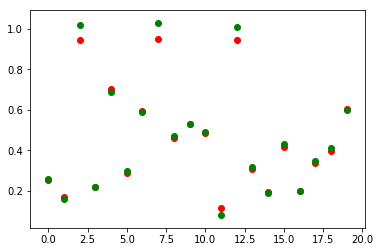

In [101]:
plt.scatter( range(20), x_pred, c='r')
plt.scatter( range(20), y_test, c='g')
plt.show()

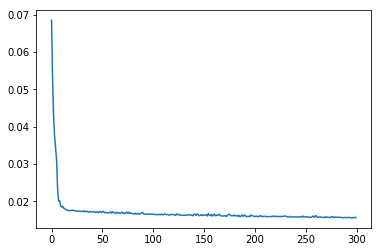

In [102]:
plt.plot(history.history['loss'])
plt.show()

In [104]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


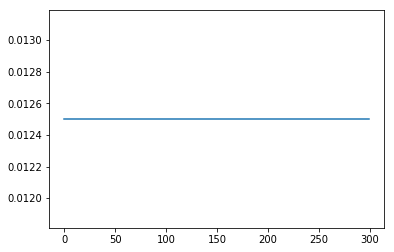

In [108]:
plt.plot(history.history['acc'])
plt.show()